In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv("train.csv")
df

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [14]:
df_train = df.drop("id",axis=1)
df_train,df_test,df_train["target"],Y_test = train_test_split(
    df_train.drop("target",axis=1), df_train["target"],test_size=0.2)

In [15]:
df_train

,gravity,ph,osmo,cond,urea,calc,target
328,1.025,5.60,840,24.5,395,7.64,1
112,1.024,5.77,874,29.9,380,4.49,1
225,1.021,5.53,874,14.6,385,8.48,1
200,1.040,6.28,838,14.3,486,8.53,1
256,1.021,5.33,702,23.6,330,4.18,0
...,...,...,...,...,...,...,...
124,1.017,6.13,594,33.6,224,3.01,0
20,1.011,7.01,395,26.0,95,1.53,0
162,1.015,5.98,487,13.3,198,1.55,0
157,1.026,6.19,577,17.9,164,1.16,1


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<Axes: >

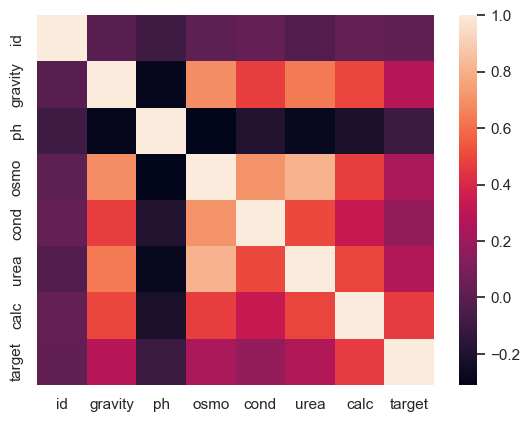

In [17]:
sns.heatmap(df.corr())

In [18]:
def preprocess(df_train):
    df_train["gravity"] = (df_train["gravity"] -1)*100
    df_train["osmo"] = (df_train["osmo"])/100
    df_train["cond"] = (df_train["cond"])/10
    df_train["urea"] = (df_train["urea"])/100

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


In [67]:
y_train = df_train["target"]
for a,b in k_fold.split(df_train):
    print(y_train.iloc[a])


328    1
112    1
225    1
200    1
256    0
      ..
124    0
20     0
162    0
157    1
49     0
Name: target, Length: 297, dtype: int64
328    1
112    1
225    1
200    1
256    0
      ..
54     0
124    0
20     0
162    0
157    1
Name: target, Length: 298, dtype: int64
328    1
225    1
200    1
256    0
135    0
      ..
124    0
20     0
162    0
157    1
49     0
Name: target, Length: 298, dtype: int64
328    1
112    1
225    1
200    1
256    0
      ..
227    1
20     0
162    0
157    1
49     0
Name: target, Length: 298, dtype: int64
328    1
112    1
225    1
200    1
56     0
      ..
124    0
20     0
162    0
157    1
49     0
Name: target, Length: 298, dtype: int64
328    1
112    1
256    0
56     0
135    0
      ..
124    0
20     0
162    0
157    1
49     0
Name: target, Length: 298, dtype: int64
328    1
112    1
225    1
200    1
256    0
      ..
124    0
20     0
162    0
157    1
49     0
Name: target, Length: 298, dtype: int64
112    1
225    1
200    1


In [77]:
def cross_val(estimator,cv,X,y):
    models = []
    scores = []
    for train_indices,test_indices in cv.split(X):
        print(estimator)
        model = estimator
        model.compile(optimizer="adam",loss=tf.keras.losses.binary_crossentropy,metrics=["accuracy"])
        model.fit(X.iloc[train_indices],y.iloc[train_indices],epochs=50)
        scores.append(model.evaluate(X.iloc[test_indices],y.iloc[test_indices]))
        models.append(model)
    return scores,models
        

In [78]:
models,scores  = cross_val(model,k_fold,df_train.drop("target",axis=1), df_train["target"])
print(model,scores)

Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 1.5875 - accuracy: 0.5118
Epoch 2/50
10/10 [==============================] - 0s 1ms/step - loss: 1.0688 - accuracy: 0.5623
Epoch 3/50
10/10 [==============================] - 0s 0s/step - loss: 0.8234 - accuracy: 0.5657
Epoch 4/50
10/10 [==============================] - 0s 1ms/step - loss: 0.7088 - accuracy: 0.6061
Epoch 5/50
10/10 [==============================] - 0s 0s/step - loss: 0.7611 - accuracy: 0.5960
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.7331 - accuracy: 0.5993
Epoch 7/50
10/10 [==============================] - 0s 1ms/step - loss: 0.7539 - accuracy: 0.5758
Epoch 8/50
10/10 [==============================] - 0s 667us/step - loss: 0.7016 - accuracy: 0.5724
Epoch 9/50
10/10 [==============================] - 0s 1ms/step - loss: 1.0456 - accuracy: 0.5589
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9997 - accuracy: 0.6027
Epoch 11/50
10/10 [

In [81]:

trained_model = scores[models.index(max(models))]
model.fit(df_train)

3/3 [==============================] - 0s 8ms/step - loss: 0.6717 - accuracy: 0.7108


[0.6717436909675598, 0.7108433842658997]

In [55]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
clf = xgb.XGBClassifier(objective="binary:logistic", random_state=100)
scoring = 'accuracy'
score = cross_val_score(clf, df_train.drop("target",axis=1), df_train["target"], cv=k_fold, n_jobs=1, scoring=scoring)
clf.fit(df_train.drop("target",axis=1), df_train["target"])
print(score)

[0.64285714 0.71428571 0.64285714 0.54761905 0.68292683 0.75609756
 0.65853659 0.68292683 0.70731707 0.82926829]


In [56]:
df_test = pd.read_csv("test.csv")

In [57]:
preprocess(df_test)


In [58]:
y_pred = clf.predict(df_test.drop("id",axis=1))

In [73]:
df_out = pd.DataFrame()
df_out["id"] = df_test["id"]
df_out = df_out.set_index("id")
df_out["target"] = y_pred_mlp.round()
df_out.to_csv("Submission.csv")

In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(64,activation="tanh"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

In [68]:
model.compile(optimizer="adam",loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [69]:
model.fit(df_train.drop("target",axis=1), df_train["target"],epochs=100,batch_size=16)

Epoch 1/100
26/26 [==============================] - 1s 1ms/step - loss: 0.8042 - accuracy: 0.5604
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6612 - accuracy: 0.7029
Epoch 3/100
26/26 [==============================] - 0s 901us/step - loss: 0.6144 - accuracy: 0.7174
Epoch 4/100
26/26 [==============================] - 0s 855us/step - loss: 0.5861 - accuracy: 0.7319
Epoch 5/100
26/26 [==============================] - 0s 802us/step - loss: 0.5736 - accuracy: 0.7295
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5696 - accuracy: 0.7343
Epoch 7/100
26/26 [==============================] - 0s 971us/step - loss: 0.5637 - accuracy: 0.7319
Epoch 8/100
26/26 [==============================] - 0s 745us/step - loss: 0.5627 - accuracy: 0.7343
Epoch 9/100
26/26 [==============================] - 0s 844us/step - loss: 0.5596 - accuracy: 0.7391
Epoch 10/100
26/26 [==============================] - 0s 909us/step - loss: 0.5578 - accuracy: 0.

In [71]:
y_pred_mlp = model.predict(df_test.drop("id",axis=1))

9/9 [==============================] - 0s 271us/step
